## **Importing Libraries**

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
from fastai.vision import *
from fastai.metrics import error_rate

## **Synthesizing Data**

In [31]:
# number of samples
n = 100
# number of features
f = 2

# feature values for first 5 samples
x = torch.ones(n, f)
x[:,0].uniform_(-1,1)
x[:5]

tensor([[ 0.4784,  1.0000],
        [ 0.2595,  1.0000],
        [ 0.9159,  1.0000],
        [-0.0203,  1.0000],
        [-0.7928,  1.0000]])

In [32]:
# weights/parameters
w = tensor(3., 2.)
w

tensor([3., 2.])

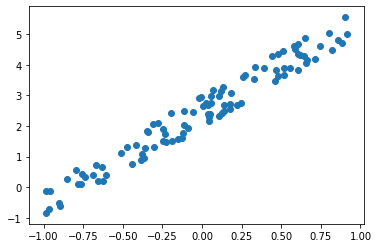

In [33]:
y = x@w + torch.rand(n)
plt.scatter(x[:,0], y)

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [34]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()



Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [35]:
a = tensor(-1., 1.)

In [36]:
y_hat = x@a
mse(y_hat, y)

tensor(6.3983)

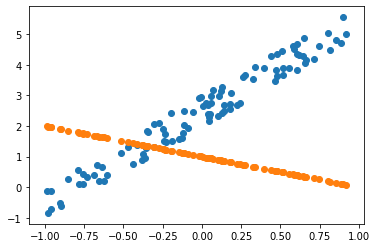

In [37]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)


## **Gradient Descent**

In [38]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [39]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss, a)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [40]:
lr = 1e-1
for t in range(100):
    update()

tensor(6.3983, grad_fn=<MeanBackward0>) Parameter containing:
tensor([-1.,  1.], requires_grad=True)
tensor(1.5486, grad_fn=<MeanBackward0>) Parameter containing:
tensor([0.6628, 2.2993], requires_grad=True)
tensor(0.5884, grad_fn=<MeanBackward0>) Parameter containing:
tensor([1.6316, 2.4400], requires_grad=True)
tensor(0.2710, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.1955, 2.4559], requires_grad=True)
tensor(0.1635, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.5238, 2.4580], requires_grad=True)
tensor(0.1272, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.7149, 2.4584], requires_grad=True)
tensor(0.1148, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.8261, 2.4586], requires_grad=True)
tensor(0.1106, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.8908, 2.4587], requires_grad=True)
tensor(0.1092, grad_fn=<MeanBackward0>) Parameter containing:
tensor([2.9284, 2.4588], requires_grad=True)
tensor(0.1088, grad_fn=<MeanBackward0>) Par

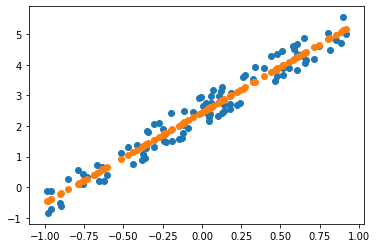

In [49]:
y_hat = x@a
y_hat.detach_().numpy()

plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)